# Assembling my pipeline



In [1]:
from bs4 import BeautifulSoup
import requests
import json 
import pandas as pd
import numpy as np

Getting battle logs: 

The following cell compiles a list of all the battles by making use of the queries provided by Pokemon Showdown. It executes the queries for the desired format. After that, it uses a continue parameter to keep retrieving entries. After obtaining al ist of all the battle addresses, another cell steps into the page associated with the id and downloads the log for the battle. 

In [2]:

def retrieve(url) : 
    page = requests.get(url)
    #soup = BeautifulSoup(page.text, "html.parser")
    resultJson = json.loads(page.text)
    return pd.DataFrame(resultJson)


def gen3_ou_battle_miner(num_battles) : 
    assert num_battles % 50 == 0, "The number of battles must be a multiple of 50"
    counter_limit = num_battles / 50
    counter = 0
    query = "https://replay.pokemonshowdown.com/search.json?format=gen3ou"
    df = retrieve(query)
    while (counter < counter_limit) :
        if len(df["id"].to_numpy()) < 51:
            break
        continue_from = df["uploadtime"].to_numpy()[-1]
        newQuery = query + f"&before={continue_from}"
        nextDF = retrieve(newQuery)
        df = pd.concat([df, nextDF], axis = 0)
        counter += 1
        print(f"{((counter * 50) / num_battles) * 100}/100")
    print("100/100")
    print("Download success!")
    return df

def gen3_ou_battle_miner_with_time(num_battles, time, before_or_after = "before") :
    assert num_battles % 50 == 0, "The number of battles must be a multiple of 50"
    counter_limit = num_battles / 50
    counter = 0
    root = "https://replay.pokemonshowdown.com/search.json?format=gen3ou"
    if before_or_after == "before" :
        query = f"https://replay.pokemonshowdown.com/search.json?format=gen3ou&before={time}"
    elif before_or_after == "after" :
        query = f"https://replay.pokemonshowdown.com/search.json?format=gen3ou&after={time}"
    df = retrieve(query)
    while (counter < counter_limit) :
        if len(df["id"].to_numpy()) < 51:
            break
        continue_from = df["uploadtime"].to_numpy()[-1]
        if before_or_after == "before" :
            newQuery = root + f"&before={continue_from}"
        elif before_or_after == "after" :
            newQuery = root + f"&after={continue_from}"
        nextDF = retrieve(newQuery)
        df = pd.concat([df, nextDF], axis = 0)
        print(f"{((counter * 50) / num_battles) * 100}/100")
        counter += 1
    print("100/100")
    print("Download success!")
    return df

class battle:
    def __init__(self, id, elo, data) :
        self.id = id
        self.elo = elo
        self.data = data


#battles = gen3_ou_battle_miner(2000) 

def battleDataExtractor(battles) :
    eloBattles = battles.dropna(axis = 0, subset = "rating")
    ids = eloBattles["id"].to_numpy()
    elos = eloBattles["rating"].to_numpy()
    df = pd.DataFrame()
    count = 0
    for i, j in zip(ids, elos) :
        page = requests.get(f"https://replay.pokemonshowdown.com/{i}.log")
        #soup = BeautifulSoup(page.text)
        id = i
        data = page.text
        elo = j
        row = pd.DataFrame({"id" : [id], "data" : [data], "elo" : [elo]})
        df = pd.concat([df, row], axis = 0)
        count += 1
        print(f"{(count / len(ids)) * 100}/100")
    print("download successful")
    return df

#battleData = battleDataExtractor(battles)

#battleData


In [19]:
#battles = gen3_ou_battle_miner(20000)
df = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/bigBattles1.csv")
df
#battles_next = gen3_ou_battle_miner_with_time(10000, 1714191575)
battles = gen3_ou_battle_miner_with_time(10000, 1709285508)

0.0/100
0.5/100
1.0/100
1.5/100
2.0/100
2.5/100
3.0/100
3.5000000000000004/100
4.0/100
4.5/100
5.0/100
5.5/100
6.0/100
6.5/100
7.000000000000001/100
7.5/100
8.0/100
8.5/100
9.0/100
9.5/100
10.0/100
10.5/100
11.0/100
11.5/100
12.0/100
12.5/100
13.0/100
13.5/100
14.000000000000002/100
14.499999999999998/100
15.0/100
15.5/100
16.0/100
16.5/100
17.0/100
17.5/100
18.0/100
18.5/100
19.0/100
19.5/100
20.0/100
20.5/100
21.0/100
21.5/100
22.0/100
22.5/100
23.0/100
23.5/100
24.0/100
24.5/100
25.0/100
25.5/100
26.0/100
26.5/100
27.0/100
27.500000000000004/100
28.000000000000004/100
28.499999999999996/100
28.999999999999996/100
29.5/100
30.0/100
30.5/100
31.0/100
31.5/100
32.0/100
32.5/100
33.0/100
33.5/100
34.0/100
34.5/100
35.0/100
35.5/100
36.0/100
36.5/100
37.0/100
37.5/100
38.0/100
38.5/100
39.0/100
39.5/100
40.0/100
40.5/100
41.0/100
41.5/100
42.0/100
42.5/100
43.0/100
43.5/100
44.0/100
44.5/100
45.0/100
45.5/100
46.0/100
46.5/100
47.0/100
47.5/100
48.0/100
48.5/100
49.0/100
49.5/100
50.0/10

In [20]:
#battleTable = battleDataExtractor(battles_next)
battleTable = battleDataExtractor(battles)

0.011307100859339666/100
0.022614201718679332/100
0.033921302578018994/100
0.045228403437358664/100
0.05653550429669833/100
0.06784260515603799/100
0.07914970601537766/100
0.09045680687471733/100
0.10176390773405698/100
0.11307100859339667/100
0.12437810945273632/100
0.13568521031207598/100
0.14699231117141565/100
0.15829941203075532/100
0.16960651289009498/100
0.18091361374943465/100
0.1922207146087743/100
0.20352781546811397/100
0.21483491632745366/100
0.22614201718679333/100
0.23744911804613297/100
0.24875621890547264/100
0.2600633197648123/100
0.27137042062415195/100
0.2826775214834916/100
0.2939846223428313/100
0.30529172320217096/100
0.31659882406151063/100
0.3279059249208503/100
0.33921302578018997/100
0.35052012663952964/100
0.3618272274988693/100
0.3731343283582089/100
0.3844414292175486/100
0.3957485300768883/100
0.40705563093622793/100
0.4183627317955676/100
0.4296698326549073/100
0.44097693351424694/100
0.45228403437358666/100
0.4635911352329263/100
0.47489823609226595/100


In [24]:
battleTable[battleTable["elo"] > 1300]

,id,data,elo
0,gen3ou-2070898495,|j|☆wallik\n|j|‽laugh to the bank\n|t:|1709276...,1575.0
0,gen3ou-2070902187,|j|☆Zoarto\n|j|☆froglover420\n|t:|1709277269\n...,1356.0
0,gen3ou-2070879837,|j|☆Cloud bolt\n|j|‽laugh to the bank\n|t:|170...,1531.0
0,gen3ou-2070880833,|j|☆Zoarto\n|j|☆stashpot\n|t:|1709273368\n|gam...,1410.0
0,gen3ou-2070876708,|j|☆Emanuel Jasker\n|j|☆wallik\n|t:|1709272645...,1552.0
...,...,...,...
0,gen3ou-2026285063,|j|☆night_0f_fire\n|j|☆chardbungus\n|t:|170430...,1304.0
0,gen3ou-2026280411,|j|☆Frogiced\n|j|☆Catmode\n|t:|1704306963\n|ga...,1398.0
0,gen3ou-2026258207,|j|☆Xenocles\n|j|☆cariacture\n|t:|1704305149\n...,1358.0
0,gen3ou-2026207442,|j|☆Eevee0\n|j|☆Jacopino08\n|t:|1704300902\n|g...,1322.0


In [3]:
battles2 = gen3_ou_battle_miner_with_time(5000, "1715219056")
battleData2 = battleDataExtractor(battles2)
battleData2

download successful


,id,data,elo
0,gen3ou-2120869637,|j|☆billnyebutwhyy\n|j|☆Icebender\n|t:|1715218...,1376.0
0,gen3ou-2120865441,|j|☆VoidVolta\n|j|☆Gonggebals\n|t:|1715217496\...,1219.0
0,gen3ou-2120860696,|j|☆larumbae\n|j|☆Draco ko Meteor\n|t:|1715216...,1093.0
0,gen3ou-2120856901,|j|☆scuba moth\n|j|☆Ick Glokmah 777\n|t:|17152...,1518.0
0,gen3ou-2120856127,|j|☆BrokeShrek\n|j|☆Ick Glokmah 777\n|t:|17152...,1509.0
...,...,...,...
0,gen3ou-2101122860,"|uhtml|medal-msg|<div class=""broadcast-blue"">C...",1095.0
0,gen3ou-2101117181,"|uhtml|medal-msg|<div class=""broadcast-blue"">C...",1570.0
0,gen3ou-2101094261,"|uhtml|medal-msg|<div class=""broadcast-blue"">C...",1493.0
0,gen3ou-2101080803,"|uhtml|medal-msg|<div class=""broadcast-blue"">C...",1360.0


In [4]:
#battleData.to_csv("C:/Users/coliv/summerProjects/Summer-Repository/secondBattleTable.csv")
#battleData
#battleData2.to_csv("C:/Users/coliv/summerProjects/Summer-Repository/thirdBattleTable.csv")

The following cells parse each log and construct csvs with meaningful information about each battle. It looks for several keywords and constructs Pokemon datastructures to keep track of the relevant information. it then constructs dataframes based on this information for each turn of the battle. 

In [7]:
class Pokemon : 
    def __init__(self, name, hp, status) : 
        self.name = name
        self.hp = hp
        self.status = status
        self.attack = 0
        self.defense = 0
        self.spattack = 0
        self.spdef = 0
        self.speed = 0
        self.move = set()
        self.move.add("switch")
    
    def equals(self, otherMon) :
        if (self.name == otherMon.name) :
            return True
        else: 
            return False
        
    def resetModifiers(self) :
        self.attack = 0
        self.defense = 0
        self.spattack = 0
        self.spdef = 0
        self.speed = 0

            
class PokemonList :
    def __init__(self) :
        self.backingList = []

    def contains(self, Pokemon : str) :
        for i in self.backingList :
            if i.name == Pokemon :
                return True
        return False
        
    def put(self, Pokemon : Pokemon) :
        if self.contains(Pokemon.name) == False :
            self.backingList.append(Pokemon)

    def get(self, Pokemon : str) :
        for i in self.backingList :
            if i.name == Pokemon :
                return i
    def getNames(self) :
        nameList = []
        for i in self.backingList :
            nameList.append(i.name)
        return nameList
    def toString(self):
        names = ""
        for i in self.backingList :
            names += i.name + ", "
        return names

In [8]:
def nicknameToNameV2(linesplit) :
    nicknameToNameMap = {}
    for i in linesplit :
        if ("|switch|" in i or "|drag|" in i) :
            nameValues = i.rsplit("|")[2:4]
            nickname = nameValues[0][5:]
            if ("," in nameValues[1]):
                name = nameValues[1][:nameValues[1].find(",")]
            else:
                name = nameValues[1]
            nicknameToNameMap.update({nickname : name})
    return nicknameToNameMap

def damageApplier(damageString : str) :
    if ("fnt" in damageString) :
        return 0
    num = damageString.split("/")
    if (" " in num[1]) :
        return int(num[0]) / int(num[1][:num[1].find(" ")])
    else: 
        return int(num[0]) / int(num[1])

In [1]:
def battleParser(log, id, elo) :
    df = pd.DataFrame()
    splitLog = log.split("|start\n")
    preBattle = splitLog[0]

    playerMap = {}
    battleSummary = preBattle.split("\n")
    for line in battleSummary :
        if "|player|" in line:
            if "p1" in line:
                playerMap.update({line.split("|")[3] : "p1a"})
            if "p2" in line:
                playerMap.update({line.split("|")[3] : "p2a"})

    try:
        battleSection = splitLog[1]
    except:
        print(splitLog)
        print(id)
        return
    lineSplit = battleSection.split("\n")
    map = nicknameToNameV2(lineSplit)

    party1 = PokemonList()
    party2 = PokemonList()
    activePokemon1 = "null"
    activePokemon2 = "null"
    switch1 = "null"
    switch2 = "null"
    move1 = "null"
    move2 = "null"
    hp1 = "null"  
    hp2 = "null"
    status1 = "null"
    status2 = "null"
    attack1 = "null"
    attack2 = "null"
    defense1 = "null"
    defense2 = "null"
    spattack1 = "null"
    spattack2 = "null"
    spdefense1 = "null"
    spdefense2 = "null"
    speed1 = "null"
    speed2 = "null"
    monTracker1 = "null"
    monTracker2 = "null"
    winner = "tie"

    for line in lineSplit :
        if "|switch|" in line or "|drag|" in line :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                name = partitionedLine[2][5:]
                monTracker1 = Pokemon(map.get(name), 1, "null")
                party1.put(monTracker1)
                if (activePokemon1 != "null") : 
                    party1.get(activePokemon1).resetModifiers()
            if ("p2a" in partitionedLine[2]) :
                name = partitionedLine[2][5:]
                monTracker2 = Pokemon(map.get(name), 1, "null")
                party2.put(monTracker2)
                if (activePokemon2 != "null") :
                    party2.get(activePokemon2).resetModifiers()
            
        if "|move|" in line :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                move1 = partitionedLine[3]
                party1.get(activePokemon1).move.add(partitionedLine[3])
            if ("p2a" in partitionedLine[2]) :
                move2 = partitionedLine[3]
                party2.get(activePokemon2).move.add(partitionedLine[3])
        if "-damage" in line :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:])
                number = damageApplier(partitionedLine[3])
                party1.get(recipient).hp = number
            if ("p2a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:])
                number = damageApplier(partitionedLine[3])
                party2.get(recipient).hp = number
        if "-heal" in line :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:])
                number = damageApplier(partitionedLine[3])
                party1.get(recipient).hp = number
            if ("p2a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:]) 
                number = damageApplier(partitionedLine[3])
                party2.get(recipient).hp = number
        if "-status" in line :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:])
                status = partitionedLine[3]
                party1.get(recipient).status = status
            if ("p2a" in partitionedLine[2]) :
                recipient = map.get(partitionedLine[2][5:])
                status = partitionedLine[3]
                party2.get(recipient).status = status
        if ("-boost" in line) :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                mon = party1.get(map.get(partitionedLine[2][5:]))
                if partitionedLine[3] == "atk":
                    mon.attack += int(partitionedLine[4])
                if partitionedLine[3] == "def":
                    mon.defense += int(partitionedLine[4])
                if partitionedLine[3] == "spa":
                    mon.spattack += int(partitionedLine[4])
                if partitionedLine[3] == "spd":
                    mon.spdef += int(partitionedLine[4])
                if partitionedLine[3] == "spe":
                    mon.speed += int(partitionedLine[4])
            if ("p2a" in partitionedLine[2]) :
                mon = party2.get(map.get(partitionedLine[2][5:]))
                if partitionedLine[3] == "atk":
                    mon.attack += int(partitionedLine[4])
                if partitionedLine[3] == "def":
                    mon.defense += int(partitionedLine[4])
                if partitionedLine[3] == "spa":
                    mon.spattack += int(partitionedLine[4])
                if partitionedLine[3] == "spd":
                    mon.spdef += int(partitionedLine[4])
                if partitionedLine[3] == "spe":
                    mon.speed += int(partitionedLine[4])
        if ("-unboost" in line) :
            partitionedLine = line.split("|")
            if ("p1a" in partitionedLine[2]) :
                mon = party1.get(map.get(partitionedLine[2][5:]))
                if partitionedLine[3] == "atk":
                    mon.attack -= int(partitionedLine[4])
                if partitionedLine[3] == "def":
                    mon.defense -= int(partitionedLine[4])
                if partitionedLine[3] == "spa":
                    mon.spattack -= int(partitionedLine[4])
                if partitionedLine[3] == "spd":
                    mon.spdef -= int(partitionedLine[4])
                if partitionedLine[3] == "spe":
                    mon.speed -= int(partitionedLine[4])
            if ("p2a" in partitionedLine[2]) :
                mon = party2.get(map.get(partitionedLine[2][5:]))
                if partitionedLine[3] == "atk":
                    mon.attack -= int(partitionedLine[4])
                if partitionedLine[3] == "def":
                    mon.defense -= int(partitionedLine[4])
                if partitionedLine[3] == "spa":
                    mon.spattack -= int(partitionedLine[4])
                if partitionedLine[3] == "spd":
                    mon.spdef -= int(partitionedLine[4])
                if partitionedLine[3] == "spe":
                    mon.speed -= int(partitionedLine[4])
        
        if ("|turn|" in line) :
            if (monTracker1.name != activePokemon1) :
                switch1 = monTracker1.name
            if (monTracker2.name != activePokemon2) :
                switch2 = monTracker2.name
            if (move1 == "null" and switch1 != "null") :
                move1 = "switch"
            if (move2 == "null" and switch2 != "null") :
                move2 = "switch"
                

            row = pd.DataFrame({"id" : [id],
                                "elo" : [elo],
                                "ActivePokemon1" : [activePokemon1],
                                "ActivePokemon2" : [activePokemon2],
                                "target1" : [activePokemon2],
                                "target2" : [activePokemon1],
                                "move1" : [move1],
                                "move2" : [move2],
                                "switch1" : [switch1],
                                "switch2" : [switch2],
                                "hp1" : [hp1],
                                "hp2" : [hp2],
                                "status1" : [status1], 
                                "status2" : [status2], 
                                "attack1" : [attack1], 
                                "attack2" : [attack2],
                                "defense1" : [defense1],
                                "defense2" : [defense2],
                                "spattack1" : [spattack1],
                                "spattack2" : [spattack2],
                                "spdefense1" : [spdefense1],
                                "spdefense2" : [spdefense2],
                                "speed1" : [speed1],
                                "speed2" : [speed2],
                                })
            df = pd.concat([df, row], axis = 0)

            activePokemon1 = monTracker1.name     
            activePokemon2 = monTracker2.name
            hp1 = monTracker1.hp  
            hp2 = monTracker2.hp
            status1 = monTracker1.status
            status2 = monTracker2.status
            attack1 = monTracker1.attack
            attack2 = monTracker2.attack
            defense1 = monTracker1.defense
            defense2 = monTracker2.defense
            spattack1 = monTracker1.spattack
            spattack2 = monTracker2.spattack
            spdefense1 = monTracker1.spdef
            spdefense2 = monTracker2.spdef
            speed1 = monTracker1.speed
            speed2 = monTracker2.speed
            move1 = "null"
            move2 = "null"
            switch1 = "null"
            switch2 = "null"

        if ("|win|" in line) :
            partitionedLine = line.split("|")
            winner = playerMap.get(partitionedLine[2])

    row = pd.DataFrame({"id" : [id],
                        "elo" : [elo],
                        "ActivePokemon1" : [activePokemon1],
                        "ActivePokemon2" : [activePokemon2],
                        "target1" : [activePokemon2],
                        "target2" : [activePokemon1],
                        "move1" : [move1],
                        "move2" : [move2],
                        "switch1" : [switch1],
                        "switch2" : [switch2],
                        "hp1" : [hp1],
                        "hp2" : [hp2],
                        "status1" : [status1], 
                        "status2" : [status2], 
                        "attack1" : [attack1], 
                        "attack2" : [attack2],
                        "defense1" : [defense1],
                        "defense2" : [defense2],
                        "spattack1" : [spattack1],
                        "spattack2" : [spattack2],
                        "spdefense1" : [spdefense1],
                        "spdefense2" : [spdefense2],
                        "speed1" : [speed1],
                        "speed2" : [speed2],
                        })
    df = pd.concat([df, row], axis = 0) 
    
    numRows = df.shape[0]
    tracker = 0
    indexList = []
    winnerList = []
    partyList1 = []
    partyList2 = []
    for i in range(numRows) :
        indexList.append(tracker)
        winnerList.append(winner)
        partyList1.append(party1.toString())
        partyList2.append(party2.toString())
        tracker += 1
    winnerDF = pd.DataFrame({"turn" : indexList, "winner" : winnerList, "party1" : partyList1, "party2" : partyList2})

    df = pd.concat([winnerDF, df.reset_index()], axis = 1).iloc[1:].reset_index()

    active1Column = df["ActivePokemon1"]
    active2Column = df["ActivePokemon2"]

    movePoolCol1 = []
    movePoolCol2 = []
    for i, j in zip (active1Column, active2Column) :
        movePool1 = list(party1.get(i).move)
        movePool2 = list(party2.get(j).move)
        movePoolCol1.append(movePool1)
        movePoolCol2.append(movePool2)

    movePoolSeries1 = pd.Series(movePoolCol1)
    movePoolSeries2 = pd.Series(movePoolCol2)

    df["movePool1"] = movePoolSeries1
    df["movePool2"] = movePoolSeries2
    
    return df

"""
    df = pd.concat([df, movePoolDF1, movePoolDF2], axis = 1)
    movePoolDF1 = pd.DataFrame({"movePool1" : movePoolCol1})
    movePoolDF2 = pd.DataFrame({"movePool2" : movePoolCol2})
"""


IndentationError: unexpected indent (615358705.py, line 279)

In [29]:
battles = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/battles.csv")
table = battles.drop("Unnamed: 0", axis = 1)
table


,id,data,elo
0,gen3ou-2155335856,|j|☆ToxicSandSpikes\n|j|☆TheComanderXD\n|t:|17...,1517.0
1,gen3ou-2155338690,|j|☆ComplexeEntonoir\n|j|☆Sneakerfart\n|t:|172...,1189.0
2,gen3ou-2155333270,|j|☆Majin of Error\n|j|☆KabutopsEnthusiast\n|t...,1078.0
3,gen3ou-2155331433,|j|☆VolCelebi\n|j|☆zinc3\n|t:|1720139478\n|gam...,1579.0
4,gen3ou-2155329942,|j|☆a_person_159\n|j|☆VolCelebi\n|t:|172013925...,1403.0
...,...,...,...
1735,gen3ou-2148112945,|j|☆Magnetsk\n|j|☆peak pederasty\n|t:|17190757...,1473.0
1736,gen3ou-2148102443,|j|☆mobjamin\n|j|☆TheTibbs7\n|t:|1719074449\n|...,1090.0
1737,gen3ou-2148095592,|j|☆Xyzzy 1\n|j|‽Jimothy G4MING\n|t:|171907357...,1560.0
1738,gen3ou-2148090768,|j|☆razernaga14\n|j|☆PuddingMcNick\n|t:|171907...,1131.0


You need to implement the reset on the stat mods in the switch section of the code

In [29]:
page = requests.get("https://replay.pokemonshowdown.com/gen3ou-2154169336.log")
#soup = BeautifulSoup(page.text)
log = page.text
test = battleParser(log, 1, 1)
test[["id", "move1"]]



,id,move1
1,1,Spikes
2,1,switch
3,1,switch
4,1,Protect
5,1,switch
6,1,Protect
7,1,Whirlwind
8,1,Spikes
9,1,Spikes
10,1,Protect


In [23]:
battles2 = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/secondBattleTable.csv").drop("Unnamed: 0", axis = 1)
battles2

df = pd.DataFrame()
count = 0
for i, j, k in zip(battles2["data"].to_numpy(), battles2["id"].to_numpy(), battles2["elo"].to_numpy()) :
    df = pd.concat([df, battleParser(i, j, k)], axis = 0)
    count += 1

df

,level_0,turn,winner,party1,party2,index,id,elo,ActivePokemon1,ActivePokemon2,...,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2,movePool1,movePool2
0,1,1,p1a,"Blissey, Skarmory, Milotic, Claydol, Dusclops,...","Ninjask, Octillery, Breloom, Snorlax, Tyranitar,",0,gen3ou-2148078214,1554.0,Blissey,Ninjask,...,0,0,0,0,0,0,0,0,"[Seismic Toss, switch, Aromatherapy]","[Substitute, Protect, Baton Pass, Toxic, switch]"
1,2,2,p1a,"Blissey, Skarmory, Milotic, Claydol, Dusclops,...","Ninjask, Octillery, Breloom, Snorlax, Tyranitar,",0,gen3ou-2148078214,1554.0,Blissey,Ninjask,...,0,0,0,0,0,0,0,1,"[Seismic Toss, switch, Aromatherapy]","[Substitute, Protect, Baton Pass, Toxic, switch]"
2,3,3,p1a,"Blissey, Skarmory, Milotic, Claydol, Dusclops,...","Ninjask, Octillery, Breloom, Snorlax, Tyranitar,",0,gen3ou-2148078214,1554.0,Blissey,Ninjask,...,0,0,0,0,0,0,0,2,"[Seismic Toss, switch, Aromatherapy]","[Substitute, Protect, Baton Pass, Toxic, switch]"
3,4,4,p1a,"Blissey, Skarmory, Milotic, Claydol, Dusclops,...","Ninjask, Octillery, Breloom, Snorlax, Tyranitar,",0,gen3ou-2148078214,1554.0,Skarmory,Ninjask,...,0,0,0,0,0,0,0,3,"[Protect, Thief, Spikes, Roar, switch]","[Substitute, Protect, Baton Pass, Toxic, switch]"
4,5,5,p1a,"Blissey, Skarmory, Milotic, Claydol, Dusclops,...","Ninjask, Octillery, Breloom, Snorlax, Tyranitar,",0,gen3ou-2148078214,1554.0,Skarmory,Octillery,...,0,0,0,0,0,0,0,0,"[Protect, Thief, Spikes, Roar, switch]","[Ice Beam, Substitute, Surf, Toxic, switch]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,14,14,p1a,"Tyranitar, Metagross, Salamence, Swampert, Mag...","Tyranitar, Swampert, Blissey, Starmie, Gengar,...",0,gen3ou-2120876822,1523.0,Swampert,Swampert,...,0,0,0,0,0,0,0,0,"[Hydro Pump, switch]","[Protect, switch, Surf, Earthquake]"
14,15,15,p1a,"Tyranitar, Metagross, Salamence, Swampert, Mag...","Tyranitar, Swampert, Blissey, Starmie, Gengar,...",0,gen3ou-2120876822,1523.0,Swampert,Swampert,...,0,0,0,0,0,0,0,0,"[Hydro Pump, switch]","[Protect, switch, Surf, Earthquake]"
15,16,16,p1a,"Tyranitar, Metagross, Salamence, Swampert, Mag...","Tyranitar, Swampert, Blissey, Starmie, Gengar,...",0,gen3ou-2120876822,1523.0,Swampert,Skarmory,...,0,0,0,0,0,0,0,0,"[Hydro Pump, switch]","[Protect, switch]"
16,17,17,p1a,"Tyranitar, Metagross, Salamence, Swampert, Mag...","Tyranitar, Swampert, Blissey, Starmie, Gengar,...",0,gen3ou-2120876822,1523.0,Swampert,Skarmory,...,0,0,0,0,0,0,0,0,"[Hydro Pump, switch]","[Protect, switch]"


In [26]:
battles3 = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/thirdBattleTable.csv").drop("Unnamed: 0", axis = 1)

df = pd.DataFrame()
count = 0
for i, j, k in zip(battles3["data"].to_numpy(), battles3["id"].to_numpy(), battles3["elo"].to_numpy()) :
    df = pd.concat([df, battleParser(i, j, k)], axis = 0)
    count += 1

df


,level_0,turn,winner,party1,party2,index,id,elo,ActivePokemon1,ActivePokemon2,...,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2,movePool1,movePool2
0,1,1,p2a,"Metagross, Salamence, Registeel, Heracross, Sn...","Cloyster, Houndoom, Claydol, Jolteon, Breloom,...",0,gen3ou-2120869637,1376.0,Metagross,Cloyster,...,0,0,0,0,0,0,0,0,"[Meteor Mash, switch]","[switch, Spikes]"
1,2,2,p2a,"Metagross, Salamence, Registeel, Heracross, Sn...","Cloyster, Houndoom, Claydol, Jolteon, Breloom,...",0,gen3ou-2120869637,1376.0,Metagross,Cloyster,...,0,0,0,0,0,0,0,0,"[Meteor Mash, switch]","[switch, Spikes]"
2,3,3,p2a,"Metagross, Salamence, Registeel, Heracross, Sn...","Cloyster, Houndoom, Claydol, Jolteon, Breloom,...",0,gen3ou-2120869637,1376.0,Metagross,Houndoom,...,0,0,0,0,0,0,0,0,"[Meteor Mash, switch]","[Fire Blast, switch]"
3,4,4,p2a,"Metagross, Salamence, Registeel, Heracross, Sn...","Cloyster, Houndoom, Claydol, Jolteon, Breloom,...",0,gen3ou-2120869637,1376.0,Salamence,Houndoom,...,0,0,0,0,0,0,0,0,"[Toxic, switch, Fire Blast]","[Fire Blast, switch]"
4,5,5,p2a,"Metagross, Salamence, Registeel, Heracross, Sn...","Cloyster, Houndoom, Claydol, Jolteon, Breloom,...",0,gen3ou-2120869637,1376.0,Salamence,Claydol,...,0,0,0,0,0,0,0,0,"[Toxic, switch, Fire Blast]","[Protect, Explosion, switch, Earthquake]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,28,p2a,"Skarmory, Swampert, Tyranitar, Gengar, Blissey...","Skarmory, Jolteon, Metagross, Starmie, Tyranit...",0,gen3ou-2101076942,1058.0,Skarmory,Jolteon,...,0,0,0,0,0,0,0,0,"[Protect, switch, Spikes, Whirlwind]","[Baton Pass, switch, Hidden Power, Thunderbolt]"
28,29,29,p2a,"Skarmory, Swampert, Tyranitar, Gengar, Blissey...","Skarmory, Jolteon, Metagross, Starmie, Tyranit...",0,gen3ou-2101076942,1058.0,Swampert,Jolteon,...,0,0,0,0,0,0,0,0,"[Protect, Hydro Pump, Ice Beam, switch]","[Baton Pass, switch, Hidden Power, Thunderbolt]"
29,30,30,p2a,"Skarmory, Swampert, Tyranitar, Gengar, Blissey...","Skarmory, Jolteon, Metagross, Starmie, Tyranit...",0,gen3ou-2101076942,1058.0,Swampert,Jolteon,...,0,0,0,0,0,0,0,0,"[Protect, Hydro Pump, Ice Beam, switch]","[Baton Pass, switch, Hidden Power, Thunderbolt]"
30,31,31,p2a,"Skarmory, Swampert, Tyranitar, Gengar, Blissey...","Skarmory, Jolteon, Metagross, Starmie, Tyranit...",0,gen3ou-2101076942,1058.0,Skarmory,Jolteon,...,0,0,0,0,0,0,0,0,"[Protect, switch, Spikes, Whirlwind]","[Baton Pass, switch, Hidden Power, Thunderbolt]"


In [41]:
battles4 = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/fourthBattleTable.csv").drop("Unnamed: 0", axis = 1)

df = pd.DataFrame()
count = 0
for i, j, k in zip(battles4["data"].to_numpy(), battles4["id"].to_numpy(), battles4["elo"].to_numpy()) :
    df = pd.concat([df, battleParser(i, j, k)], axis = 0)
    count += 1

df

,level_0,turn,winner,party1,party2,index,id,elo,ActivePokemon1,ActivePokemon2,...,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2,movePool1,movePool2
0,1,1,p2a,"Tyranitar, Regice, Jirachi, Weezing, Aerodacty...","Suicune, Snorlax, Metagross, Magneton, Salamen...",0,gen3ou-2178274953,1297.0,Tyranitar,Suicune,...,0,0,0,0,0,0,0,0,"[switch, Brick Break]","[Calm Mind, switch, Ice Beam, Hydro Pump]"
1,2,2,p2a,"Tyranitar, Regice, Jirachi, Weezing, Aerodacty...","Suicune, Snorlax, Metagross, Magneton, Salamen...",0,gen3ou-2178274953,1297.0,Regice,Suicune,...,0,0,0,0,0,0,0,0,"[switch, Thunderbolt]","[Calm Mind, switch, Ice Beam, Hydro Pump]"
2,3,3,p2a,"Tyranitar, Regice, Jirachi, Weezing, Aerodacty...","Suicune, Snorlax, Metagross, Magneton, Salamen...",0,gen3ou-2178274953,1297.0,Regice,Snorlax,...,0,0,0,0,0,0,0,0,"[switch, Thunderbolt]","[switch, Body Slam, Self-Destruct, Earthquake,..."
3,4,4,p2a,"Tyranitar, Regice, Jirachi, Weezing, Aerodacty...","Suicune, Snorlax, Metagross, Magneton, Salamen...",0,gen3ou-2178274953,1297.0,Jirachi,Snorlax,...,0,0,0,0,0,0,0,0,"[switch, Fire Punch]","[switch, Body Slam, Self-Destruct, Earthquake,..."
4,5,5,p2a,"Tyranitar, Regice, Jirachi, Weezing, Aerodacty...","Suicune, Snorlax, Metagross, Magneton, Salamen...",0,gen3ou-2178274953,1297.0,Jirachi,Snorlax,...,0,0,0,0,0,0,0,0,"[switch, Fire Punch]","[switch, Body Slam, Self-Destruct, Earthquake,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,20,p1a,"Skarmory, Aerodactyl, Tyranitar, Gengar, Swamp...","Forretress, Shedinja, Ninjask, Heracross, Arma...",0,gen3ou-2178149543,1000.0,Swampert,Ninjask,...,0,0,0,0,0,0,0,0,"[Surf, switch, Roar]","[Substitute, switch, Silver Wind]"
0,1,1,p2a,"Jynx, Claydol, Moltres,","Salamence, Forretress, Houndoom,",0,gen3ou-2178145961,1310.0,Jynx,Salamence,...,0,0,0,0,0,0,0,0,[switch],"[switch, Hidden Power]"
1,2,2,p2a,"Jynx, Claydol, Moltres,","Salamence, Forretress, Houndoom,",0,gen3ou-2178145961,1310.0,Claydol,Salamence,...,0,0,0,0,0,0,0,0,"[Explosion, switch]","[switch, Hidden Power]"
2,3,3,p2a,"Jynx, Claydol, Moltres,","Salamence, Forretress, Houndoom,",0,gen3ou-2178145961,1310.0,Moltres,Forretress,...,0,0,0,0,0,0,0,0,"[switch, Will-O-Wisp]",[switch]


In [33]:
data = battleTable[battleTable["id"] == "gen3ou-2169153287"]["data"][0]
data.split("\n")
battleTable

,id,data,elo
0,gen3ou-2178205050,|j|☆Qeboflu\n|j|☆SeaSaltSky\n|t:|1723414805\n|...,1110.0
0,gen3ou-2178203480,|j|☆bridoon\n|j|☆fdsafsac\n|t:|1723414624\n|ga...,1093.0
0,gen3ou-2178195942,|j|☆best dark wall\n|j|☆E-Teddy_VGC\n|t:|17234...,1059.0
0,gen3ou-2178196216,|j|☆Lvflare\n|j|☆LedZepp5200G\n|t:|1723413778\...,1196.0
0,gen3ou-2178196407,|j|☆Woodmanniceman\n|j|☆keeping it icy\n|t:|17...,1555.0
...,...,...,...
0,gen3ou-2143394757,|j|☆FrostedMegaWheat\n|j|☆Da Slack King\n|t:|1...,1165.0
0,gen3ou-2143391138,|j|☆Charpract\n|j|☆Da Slack King\n|t:|17183952...,1288.0
0,gen3ou-2143382475,|j|☆Gym Leader Ligma\n|j|☆Misa801\n|t:|1718394...,1052.0
0,gen3ou-2143382816,|j|☆astronomicfailure\n|j|☆AmpIsBad\n|t:|17183...,1086.0


In [30]:
table
dataArray = table["data"].to_numpy()
idArray = table["id"].to_numpy()
eloArray = table["elo"].to_numpy()

MasterDF = pd.DataFrame()
count = 0
for i, j, k in zip(dataArray, idArray, eloArray) :
    MasterDF = pd.concat([MasterDF, battleParser(i, j, k)], axis = 0)
    count += 1
    


MasterDF


,level_0,turn,winner,party1,party2,index,id,elo,ActivePokemon1,ActivePokemon2,...,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2,movePool1,movePool2
0,1,1,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Jolteon,Tyranitar,...,0,0,0,0,0,0,0,0,"[Baton Pass, switch, Substitute, Thunderbolt]","[switch, Hidden Power, Rock Slide]"
1,2,2,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Jolteon,Tyranitar,...,0,0,0,0,0,0,0,0,"[Baton Pass, switch, Substitute, Thunderbolt]","[switch, Hidden Power, Rock Slide]"
2,3,3,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,Tyranitar,...,0,0,0,0,0,0,0,0,"[Earthquake, switch]","[switch, Hidden Power, Rock Slide]"
3,4,4,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,Tyranitar,...,0,0,0,0,0,0,0,0,"[Earthquake, switch]","[switch, Hidden Power, Rock Slide]"
4,5,5,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,Skarmory,...,0,0,0,0,0,0,0,0,"[Earthquake, switch]","[Protect, Toxic, Spikes, Roar, switch]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,18,18,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Claydol,Gengar,...,0,0,0,0,0,0,0,0,"[Rapid Spin, Psychic, switch]","[Will-O-Wisp, Explosion, Thunderbolt, Fire Pun..."
18,19,19,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Gengar,Gengar,...,0,0,0,0,0,0,0,0,"[Will-O-Wisp, switch, Thunderbolt]","[Will-O-Wisp, Explosion, Thunderbolt, Fire Pun..."
19,20,20,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Gengar,Gengar,...,0,0,0,0,0,0,0,0,"[Will-O-Wisp, switch, Thunderbolt]","[Will-O-Wisp, Explosion, Thunderbolt, Fire Pun..."
20,21,21,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Dugtrio,Gengar,...,0,0,0,0,0,0,0,0,"[switch, Aerial Ace]","[Will-O-Wisp, Explosion, Thunderbolt, Fire Pun..."


In [22]:
MasterDF = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/BattlesDataFrame.csv")
mons = MasterDF[["ActivePokemon1", "ActivePokemon2", "party1", "party2", "move1", "move2"]]
MasterDF

,Unnamed: 0,level_0,turn,winner,party1,party2,index,id,elo,ActivePokemon1,...,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2,movePool1,movePool2
0,0,1,1,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Jolteon,...,0,0,0,0,0,0,0,0,"['Substitute', 'Baton Pass', 'Thunderbolt']","['Hidden Power', 'Rock Slide']"
1,1,2,2,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Jolteon,...,0,0,0,0,0,0,0,0,"['Substitute', 'Baton Pass', 'Thunderbolt']","['Hidden Power', 'Rock Slide']"
2,2,3,3,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,...,0,0,0,0,0,0,0,0,['Earthquake'],"['Hidden Power', 'Rock Slide']"
3,3,4,4,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,...,0,0,0,0,0,0,0,0,['Earthquake'],"['Hidden Power', 'Rock Slide']"
4,4,5,5,p1a,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","Tyranitar, Skarmory, Blissey, Charizard, Genga...",0,gen3ou-2155335856,1517.0,Dugtrio,...,0,0,0,0,0,0,0,0,['Earthquake'],"['Spikes', 'Roar', 'Toxic', 'Protect']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53304,17,18,18,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Claydol,...,0,0,0,0,0,0,0,0,"['Rapid Spin', 'Psychic']","['Will-O-Wisp', 'Explosion', 'Fire Punch', 'Th..."
53305,18,19,19,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Gengar,...,0,0,0,0,0,0,0,0,"['Will-O-Wisp', 'Thunderbolt']","['Will-O-Wisp', 'Explosion', 'Fire Punch', 'Th..."
53306,19,20,20,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Gengar,...,0,0,0,0,0,0,0,0,"['Will-O-Wisp', 'Thunderbolt']","['Will-O-Wisp', 'Explosion', 'Fire Punch', 'Th..."
53307,20,21,21,p2a,"Metagross, Blissey, Snorlax, Claydol, Gengar, ...","Skarmory, Tyranitar, Gengar,",0,gen3ou-2148085475,1223.0,Dugtrio,...,0,0,0,0,0,0,0,0,['Aerial Ace'],"['Will-O-Wisp', 'Explosion', 'Fire Punch', 'Th..."


In [20]:
import requests

moveQuery = """
{
  pokemon_v2_move(where: {pokemon_v2_generation: {name: {_in: ["generation-i", "generation-ii", "generation-iii"]}}}, order_by: {id: asc}) {
    name
    id
      }
}
"""

r = requests.post(
    "https://beta.pokeapi.co/graphql/v1beta",
    json = {
        "query": moveQuery,
    },
)

moves = r.json()["data"]["pokemon_v2_move"]
moveDF = pd.DataFrame(moves)


pokemonQuery = """
{
  pokemon_v2_pokemonspecies(where: {pokemon_v2_generation: {name: {_in: ["generation-i", "generation-ii", "generation-iii"]}}}, order_by: {id: asc}) {
    name
    id
      }
}
"""
r = requests.post(
    "https://beta.pokeapi.co/graphql/v1beta",
    json = {
        "query": pokemonQuery,
    },
)

mons = r.json()["data"]["pokemon_v2_pokemonspecies"]
monDF = pd.DataFrame(mons)



In [21]:
moveDF
monDF

,name,id
0,bulbasaur,1
1,ivysaur,2
2,venusaur,3
3,charmander,4
4,charmeleon,5
...,...,...
381,kyogre,382
382,groudon,383
383,rayquaza,384
384,jirachi,385


I need to handle the case where the move might be null if the pokemon was defeated during that turn. Maybe I should just drop all turns where there is a null for the move.

In [21]:
pokemon_to_dex_number_map = {}
for i, j in zip(monDF["name"], monDF["id"]) :
    pokemon_to_dex_number_map.update({i : j})

moveToIndexMap = {"switch" : 0}
for i, j in zip(moveDF["name"], moveDF["id"]) :
    moveToIndexMap.update({i : j})

gen3NationalDex = monDF.shape[0]
moves = moveDF.shape[0]

statusMap = {"brn" : 0, "frz" : 1, "par" : 2, "psn" : 3, "tox" : 4, "slp" : 5}


def pokemonToVector(pokemon_name) :
    #array = np.zeros(len(gen3NationalDex))
    array = [0] * len(gen3NationalDex)
    if (pokemon_name not in pokemon_to_dex_number_map) :
        return array
    dexNum = pokemon_to_dex_number_map.get(pokemon_name)
    index = dexNum - 1
    array[index] = 1
    return array

def partyToVector(pokemon_list) :
    #array = np.zeros(len(gen3NationalDex))
    array = [0] * len(gen3NationalDex)
    for i in pokemon_list:
        dexNum = pokemon_to_dex_number_map.get(i)
        index = dexNum - 1
        array[index] = 1
    return array

def moveToVector(move) :
    array = [0] * (len(moves) + 1)
    if (move not in moveToIndexMap) :
        return array
    index = moveToIndexMap.get(move)
    array[index] = 1
    return array

def moveSetToVector(moveset) :
    array = [0] * (len(moves) + 1)
    for i in moveset:
        index = moveToIndexMap.get(i)
        array[index] = 1
    return array

def statusToVector(status) :
    array = [0] * 6
    if (status not in statusMap) :
        return array
    index = statusMap.get(status)
    array[index] = 1
    return array




In [8]:
NationalDexArray = np.array(gen3NationalDex)
MoveArray = np.array(["switch"] + moves)

activeLabelArray = np.array(["active: "] * len(NationalDexArray))
activeLabels = np.char.add(activeLabelArray, NationalDexArray)

targetLabelArray = np.array(["target: "] * len(NationalDexArray))
targetLabels = np.char.add(targetLabelArray, NationalDexArray)

partyLabelArray = np.array(["Party: "] * len(NationalDexArray))
partyLabels = np.char.add(partyLabelArray, NationalDexArray)

switchLabelArray = np.array(["Switch to: "] * len(NationalDexArray))
switchLabels = np.char.add(switchLabelArray, NationalDexArray)

moveLabelArray = np.array(["move: "] * len(MoveArray))
moveLabels = np.char.add(moveLabelArray, MoveArray)

movesetLabelArray = np.array(["moveset: "] * len(MoveArray))
movesetLabels = np.char.add(movesetLabelArray, MoveArray)

labels = np.concatenate([activeLabels, targetLabels, switchLabels, partyLabels, moveLabels, movesetLabels])
labels

array(['active: Bulbasaur', 'active: Ivysaur', 'active: Venusaur', ...,
       'moveset: Will-O-Wisp', 'moveset: Wish', 'moveset: Yawn'],
      dtype='<U23')

I need to resolve missing movesets

In [20]:
MasterDF = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/BattleDF.csv")
MasterDF.drop("Unnamed: 0", axis = 1).drop("level_0", axis = 1)
MasterDF[MasterDF["move1"].isna()]["move1"]

49       NaN
53       NaN
57       NaN
64       NaN
90       NaN
        ... 
53228    NaN
53237    NaN
53263    NaN
53286    NaN
53308    NaN
Name: move1, Length: 2907, dtype: object

In [4]:
MasterDF = pd.read_csv("C:/Users/coliv/summerProjects/Summer-Repository/BattleDF.csv")
df = MasterDF.dropna(subset = ["move1", "move2"], how = "all").drop("Unnamed: 0", axis = 1).drop("level_0", axis = 1).reset_index().drop("level_0", axis = 1)
player1 = df[["id", "elo", "winner", "turn", "party1", "movePool1", "ActivePokemon1", "target1", "hp1", "hp2", "move1", "switch1", "status1", "status2", "attack1", "attack2", "defense1", "defense2", "spattack1", "spattack2", "spdefense1", "spdefense2", "speed1", "speed2"]]
player2 = df[["id", "elo", "winner", "turn", "party2", "movePool2", "ActivePokemon2", "target2", "hp1", "hp2", "move2", "switch2", "status1", "status2", "attack1", "attack2", "defense1", "defense2", "spattack1", "spattack2", "spdefense1", "spdefense2", "speed1", "speed2"]]

#fullDF = pd.concat([player1, player2], axis = 0)
playerList = ["p1"] * df.shape[0]
player2List = ["p2"] * df.shape[0]

#player1Column = pd.DataFrame({"player" : playerList})
#player2Column = pd.DataFrame({"player" : player2List})

player1Column = pd.Series(playerList)
player2Column = pd.Series(player2List)

player1["player"] = player1Column
player2["player"] = player2Column

#player1 = pd.concat([player1Column, player1], axis = 1)
#player2 = pd.concat([player2Column, player2], axis = 1)

player1 = player1.rename(columns = {"party1" : "party", "ActivePokemon1" :  "ActivePokemon", "target1" : "target", "move1" : "move", "switch1" : "switch", "movePool1" : "movePool"})
player2 = player2.rename(columns = {"party2" : "party", "ActivePokemon2" :  "ActivePokemon", "target2" : "target", "move2" : "move", "switch2" : "switch", "movePool2" : "movePool"})

df_player_split = pd.concat([player1, player2], axis = 0).reset_index()

df_player_split = df_player_split.dropna(subset = "move").reset_index().drop("level_0", axis = 1).drop("index", axis = 1)

df_player_split 

            

,player,id,elo,winner,turn,party,movePool,ActivePokemon,target,hp1,...,attack1,attack2,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2
0,p1,gen3ou-2155335856,1517.0,p1a,1,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","['switch', 'Thunderbolt', 'Baton Pass', 'Subst...",Jolteon,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
1,p1,gen3ou-2155335856,1517.0,p1a,2,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","['switch', 'Thunderbolt', 'Baton Pass', 'Subst...",Jolteon,Tyranitar,0.76,...,0,0,0,0,0,0,0,0,0,0
2,p1,gen3ou-2155335856,1517.0,p1a,3,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","['switch', 'Earthquake']",Dugtrio,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
3,p1,gen3ou-2155335856,1517.0,p1a,4,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","['switch', 'Earthquake']",Dugtrio,Tyranitar,0.29,...,0,0,0,0,0,0,0,0,0,0
4,p1,gen3ou-2155335856,1517.0,p1a,5,"Jolteon, Dugtrio, Moltres, Starmie, Steelix, B...","['switch', 'Earthquake']",Dugtrio,Skarmory,0.29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100711,p2,gen3ou-2148085475,1223.0,p2a,18,"Skarmory, Tyranitar, Gengar,","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Claydol,1.00,...,0,0,0,0,0,0,0,0,0,0
100712,p2,gen3ou-2148085475,1223.0,p2a,19,"Skarmory, Tyranitar, Gengar,","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Gengar,1.00,...,0,0,0,0,0,0,0,0,0,0
100713,p2,gen3ou-2148085475,1223.0,p2a,20,"Skarmory, Tyranitar, Gengar,","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Gengar,0.70,...,0,0,0,0,0,0,0,0,0,0
100714,p2,gen3ou-2148085475,1223.0,p2a,21,"Skarmory, Tyranitar, Gengar,","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Dugtrio,0.76,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_player_split["party"] = df_player_split["party"].str.split(", ").str[:-1]
df_player_split

,player,id,elo,winner,turn,party,movePool,ActivePokemon,target,hp1,...,attack1,attack2,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2
0,p1,gen3ou-2155335856,1517.0,p1a,1,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","['switch', 'Thunderbolt', 'Baton Pass', 'Subst...",Jolteon,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
1,p1,gen3ou-2155335856,1517.0,p1a,2,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","['switch', 'Thunderbolt', 'Baton Pass', 'Subst...",Jolteon,Tyranitar,0.76,...,0,0,0,0,0,0,0,0,0,0
2,p1,gen3ou-2155335856,1517.0,p1a,3,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","['switch', 'Earthquake']",Dugtrio,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
3,p1,gen3ou-2155335856,1517.0,p1a,4,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","['switch', 'Earthquake']",Dugtrio,Tyranitar,0.29,...,0,0,0,0,0,0,0,0,0,0
4,p1,gen3ou-2155335856,1517.0,p1a,5,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","['switch', 'Earthquake']",Dugtrio,Skarmory,0.29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100711,p2,gen3ou-2148085475,1223.0,p2a,18,"[Skarmory, Tyranitar, Gengar]","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Claydol,1.00,...,0,0,0,0,0,0,0,0,0,0
100712,p2,gen3ou-2148085475,1223.0,p2a,19,"[Skarmory, Tyranitar, Gengar]","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Gengar,1.00,...,0,0,0,0,0,0,0,0,0,0
100713,p2,gen3ou-2148085475,1223.0,p2a,20,"[Skarmory, Tyranitar, Gengar]","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Gengar,0.70,...,0,0,0,0,0,0,0,0,0,0
100714,p2,gen3ou-2148085475,1223.0,p2a,21,"[Skarmory, Tyranitar, Gengar]","['Explosion', 'Thunderbolt', 'switch', 'Fire P...",Gengar,Dugtrio,0.76,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = df_player_split["movePool"].to_numpy()[0]

def listLikeHandle(listLike) :
    output = ""
    for i in listLike:
        if i != "'" and i != "]" and i != "[" :
            output += i
    return output

listLikeHandle(test)

df_player_split["movePool"] = df_player_split["movePool"].apply(listLikeHandle).str.split(", ")
df_player_split

,player,id,elo,winner,turn,party,movePool,ActivePokemon,target,hp1,...,attack1,attack2,defense1,defense2,spattack1,spattack2,spdefense1,spdefense2,speed1,speed2
0,p1,gen3ou-2155335856,1517.0,p1a,1,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","[switch, Thunderbolt, Baton Pass, Substitute]",Jolteon,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
1,p1,gen3ou-2155335856,1517.0,p1a,2,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","[switch, Thunderbolt, Baton Pass, Substitute]",Jolteon,Tyranitar,0.76,...,0,0,0,0,0,0,0,0,0,0
2,p1,gen3ou-2155335856,1517.0,p1a,3,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","[switch, Earthquake]",Dugtrio,Tyranitar,1.00,...,0,0,0,0,0,0,0,0,0,0
3,p1,gen3ou-2155335856,1517.0,p1a,4,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","[switch, Earthquake]",Dugtrio,Tyranitar,0.29,...,0,0,0,0,0,0,0,0,0,0
4,p1,gen3ou-2155335856,1517.0,p1a,5,"[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...","[switch, Earthquake]",Dugtrio,Skarmory,0.29,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100711,p2,gen3ou-2148085475,1223.0,p2a,18,"[Skarmory, Tyranitar, Gengar]","[Explosion, Thunderbolt, switch, Fire Punch, W...",Gengar,Claydol,1.00,...,0,0,0,0,0,0,0,0,0,0
100712,p2,gen3ou-2148085475,1223.0,p2a,19,"[Skarmory, Tyranitar, Gengar]","[Explosion, Thunderbolt, switch, Fire Punch, W...",Gengar,Gengar,1.00,...,0,0,0,0,0,0,0,0,0,0
100713,p2,gen3ou-2148085475,1223.0,p2a,20,"[Skarmory, Tyranitar, Gengar]","[Explosion, Thunderbolt, switch, Fire Punch, W...",Gengar,Gengar,0.70,...,0,0,0,0,0,0,0,0,0,0
100714,p2,gen3ou-2148085475,1223.0,p2a,21,"[Skarmory, Tyranitar, Gengar]","[Explosion, Thunderbolt, switch, Fire Punch, W...",Gengar,Dugtrio,0.76,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#df_player_split[df_player_split["move"].isna()][["id", "player", "party", "movePool", "ActivePokemon", "target", "move"]]
#moveSetToVector("switch")
df_player_split.iloc[3198]
#moveToVector("Aerial Ace")

#moveSetToVector(['switch', 'Skill Swap', 'Water Pulse'])
moveToIndexMap.get("Water Pulse")

gen3_moves
df_player_split.iloc[0]

player                                                          p1
id                                               gen3ou-2155335856
elo                                                         1517.0
winner                                                         p1a
turn                                                             1
party            [Jolteon, Dugtrio, Moltres, Starmie, Steelix, ...
movePool             [switch, Thunderbolt, Baton Pass, Substitute]
ActivePokemon                                              Jolteon
target                                                   Tyranitar
hp1                                                            1.0
hp2                                                            1.0
move                                                    Substitute
switch                                                         NaN
status1                                                        NaN
status2                                                       

In [20]:
pokemonMatrix = []
activeColumn = df_player_split["ActivePokemon"].to_numpy()
targetColumn = df_player_split["target"].to_numpy()
partyColumn = df_player_split["party"].to_numpy()
switchColumn = df_player_split["switch"].to_numpy()
moveColumn = df_player_split["move"].to_numpy()
movesetColumn = df_player_split["movePool"].to_numpy()


count = 0
for u, v, w, x, y, z in zip(activeColumn, targetColumn, switchColumn, partyColumn, moveColumn, movesetColumn) :
     activeVectorRow = pokemonToVector(u)
     targetVectorRow = pokemonToVector(v)
     switchVectorRow = pokemonToVector(w)
     partyVectorRow = partyToVector(x)
     moveVectorRow = moveToVector(y)
     movesetVectorRow = moveSetToVector(z)
     pokemonMatrix.append(activeVectorRow + targetVectorRow + switchVectorRow + partyVectorRow + moveVectorRow + movesetVectorRow)
     count += 1

vectorDF = pd.DataFrame(pokemonMatrix, columns = labels)

vectorDF

,active: Bulbasaur,active: Ivysaur,active: Venusaur,active: Charmander,active: Charmeleon,active: Charizard,active: Squirtle,active: Wartortle,active: Blastoise,active: Caterpie,...,moveset: Uproar,moveset: Volt Tackle,moveset: Water Pulse,moveset: Water Sport,moveset: Water Spout,moveset: Weather Ball,moveset: Wide Slash,moveset: Will-O-Wisp,moveset: Wish,moveset: Yawn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
#MasterDF[["movePool1", "party1"]]
#MasterDF["movePool1"] = MasterDF["movePool1"].apply(listLikeHandle).str.split(", ")
#MasterDF["party1"] = MasterDF["party1"].str.split(", ")
MasterDF["party1"] = MasterDF["party1"].str[:-1]
MasterDF[["movePool1", "party1"]]

,movePool1,party1
0,"[switch, Thunderbolt, Baton Pass, Substitute]","[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ..."
1,"[switch, Thunderbolt, Baton Pass, Substitute]","[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ..."
2,"[switch, Earthquake]","[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ..."
3,"[switch, Earthquake]","[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ..."
4,"[switch, Earthquake]","[Jolteon, Dugtrio, Moltres, Starmie, Steelix, ..."
...,...,...
53304,"[switch, Psychic, Rapid Spin]","[Metagross, Blissey, Snorlax, Claydol, Gengar,..."
53305,"[switch, Will-O-Wisp, Thunderbolt]","[Metagross, Blissey, Snorlax, Claydol, Gengar,..."
53306,"[switch, Will-O-Wisp, Thunderbolt]","[Metagross, Blissey, Snorlax, Claydol, Gengar,..."
53307,"[switch, Aerial Ace]","[Metagross, Blissey, Snorlax, Claydol, Gengar,..."


In [50]:
#Vectorize the combined data
activeLabelArray = np.array(["active: "] * len(NationalDexArray))
activeLabels = np.char.add(activeLabelArray, NationalDexArray)

targetLabelArray = np.array(["target: "] * len(NationalDexArray))
targetLabels = np.char.add(targetLabelArray, NationalDexArray)

partyLabelArray = np.array(["Party: "] * len(NationalDexArray))
partyLabels = np.char.add(partyLabelArray, NationalDexArray)

switchLabelArray = np.array(["Switch to: "] * len(NationalDexArray))
switchLabels = np.char.add(switchLabelArray, NationalDexArray)

moveLabelArray = np.array(["move1: "] * len(MoveArray))
moveLabels = np.char.add(moveLabelArray, MoveArray)

moveLabelArray2 = np.array(["move2: "] * len(MoveArray))
moveLabels2 = np.char.add(moveLabelArray, MoveArray)

movesetLabelArray = np.array(["moveset: "] * len(MoveArray))
movesetLabels = np.char.add(movesetLabelArray, MoveArray)

statusLabel1 = np.array(["brn1", "frz1", "par1", "psn1", "tox1", "slp1"])

statusLabel2 = np.array(["brn2", "frz2", "par2", "psn2", "tox2", "slp2"])

labels = np.concatenate([activeLabels, targetLabels, switchLabels, partyLabels, moveLabels, moveLabels2, movesetLabels, statusLabel1, statusLabel2])
labels



pokemonMatrix = []
activeColumn = MasterDF["ActivePokemon1"].to_numpy()
targetColumn = MasterDF["target1"].to_numpy()
partyColumn = MasterDF["party1"].to_numpy()
switchColumn = MasterDF["switch1"].to_numpy()
moveColumn = MasterDF["move1"].to_numpy()
move2Column = MasterDF["move2"].to_numpy()
movesetColumn = MasterDF["movePool1"].to_numpy()
status1Column = df_player_split["status1"].to_numpy()
status2Column = df_player_split["status2"].to_numpy()

count = 0
for a, b, c, d, e, f, g, h, i in zip(activeColumn, targetColumn, switchColumn, partyColumn, moveColumn, move2Column, movesetColumn, status1Column, status2Column) :
     activeVectorRow = pokemonToVector(a)
     targetVectorRow = pokemonToVector(b)
     switchVectorRow = pokemonToVector(c)
     #print(d)
     partyVectorRow = partyToVector(d)
     moveVectorRow = moveToVector(e)
     move2VectorRow = moveToVector(f)
     movesetVectorRow = moveSetToVector(g)
     status1VectorRow = statusToVector(h)
     status2VectorRow = statusToVector(i)
     pokemonMatrix.append(activeVectorRow + targetVectorRow + switchVectorRow + partyVectorRow + moveVectorRow + move2VectorRow + movesetVectorRow + status1VectorRow + status2VectorRow)
     count += 1

vectorDF = pd.DataFrame(pokemonMatrix, columns = labels)

vectorDF


,active: Bulbasaur,active: Ivysaur,active: Venusaur,active: Charmander,active: Charmeleon,active: Charizard,active: Squirtle,active: Wartortle,active: Blastoise,active: Caterpie,...,par1,psn1,tox1,slp1,brn2,frz2,par2,psn2,tox2,slp2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
status1Column = df_player_split["status1"].to_numpy()
status2Column = df_player_split["status2"].to_numpy()

statusMatrix = []
for i, j in zip(status1Column, status2Column) :
    status1 = statusToVector(i)
    status2 = statusToVector(j)
    statusMatrix.append(status1 + status2)

statusVectorDF = pd.DataFrame(statusMatrix, columns = (["brn", "frz", "par", "psn", "tox", "slp"] * 2))

statusVectorDF

,brn,frz,par,psn,tox,slp,brn,frz,par,psn,tox,slp
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100711,0,0,0,0,0,0,0,0,0,0,0,0
100712,0,0,0,0,0,0,0,0,0,0,0,0
100713,0,0,0,0,0,0,0,0,0,0,0,0
100714,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
identifiers = df_player_split[["id", "player", "elo", "winner", "turn"]]
stats = df_player_split[["hp1", "hp2", "attack1", "attack2", "defense1", "defense2", "spattack1", "spattack2", "spdefense1", "spdefense2", "speed1", "speed2"]]
trainingVectorDF = pd.concat([identifiers, vectorDF, statusVectorDF, stats], axis = 1)


# Visualizing our data

In [8]:
import seaborn as sns
import matplotlib as plt


,move
move,
Acid Armor,8
Aerial Ace,82
Agility,332
Air Cutter,16
Amnesia,9
...,...
Withdraw,1
Wrap,7
Yawn,32


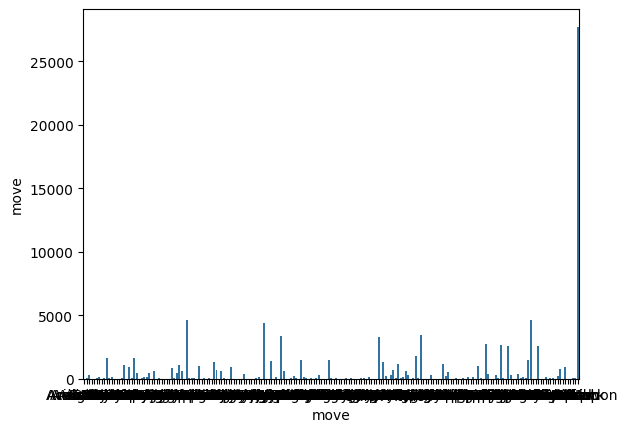

In [78]:
moveCounts = df_player_split.groupby(by = ["move"])["move"].count()
sns.barplot(moveCounts)
pd.DataFrame(moveCounts)

array([8919, 7108, 6826, 6121, 5510, 5087, 4325, 4139, 3708, 3098, 3072,
       3042, 2653, 2648, 2459, 1979, 1903, 1709, 1664, 1465, 1350, 1068,
        989,  922,  916,  873,  811,  757,  744,  711,  691,  648,  645,
        630,  568,  430,  427,  371,  368,  368,  329,  328,  324,  323,
        319,  281,  276,  266,  263,  244,  238,  236,  235,  217,  214,
        208,  205,  204,  186,  185,  161,  153,  141,  140,  138,  129,
        121,  120,  111,  103,  103,   98,   94,   92,   86,   86,   85,
         79,   70,   69,   69,   68,   60,   56,   55,   54,   52,   48,
         47,   46,   44,   41,   40,   38,   37,   37,   33,   32,   32,
         32,   30,   29,   28,   27,   26,   26,   25,   25,   25,   25,
         24,   24,   24,   23,   21,   21,   21,   20,   17,   17,   16,
         16,   14,   12,   11,   11,   11,   10,   10,    9,    9,    9,
          9,    8,    8,    8,    8,    7,    7,    7,    7,    6,    6,
          6,    6,    6,    6,    5,    5,    5,   

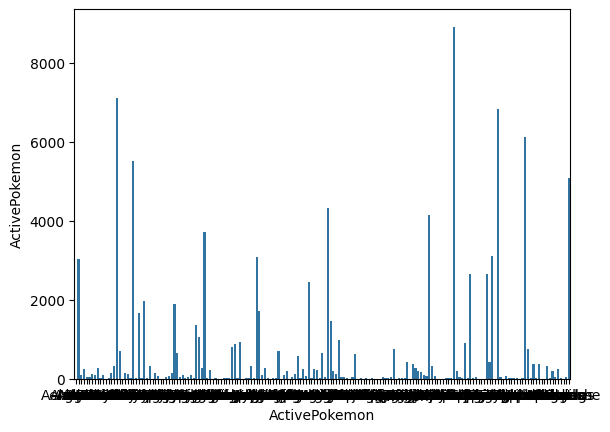

In [32]:
pokemonCounts = df_player_split.groupby(by = ["ActivePokemon"])["ActivePokemon"].count()
pd.DataFrame(pokemonCounts)
sns.barplot(pokemonCounts)
max(pokemonCounts)
df = pd.DataFrame(pokemonCounts)
df
sortedArray = np.sort(pokemonCounts)[::-1]

df["ActivePokemon"] == 8919

